This notebook is meant for trying out stuff, which might later be put to other notebooks or python scripts.

In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from api.GlassnodeAPI import GlassnodeAPI
from api.CoinGeckoAPI import CoinGeckoAPI
from functions.functions import *
from visualization.line_graph import *
from functions.impermanent_loss import *
sns.set_style('whitegrid')

In [2]:
coin_list = ['bitcoin', 'ethereum', 'fantom', 'solana', 'polkadot', 'the-sandbox', 'kusama', 'decentraland']
c = CoinGeckoAPI()

In [3]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [4]:
for coin in coin_list:
    globals()[coin] = c.get_price_cap_volume(start, end, coin=coin)

<AxesSubplot:>

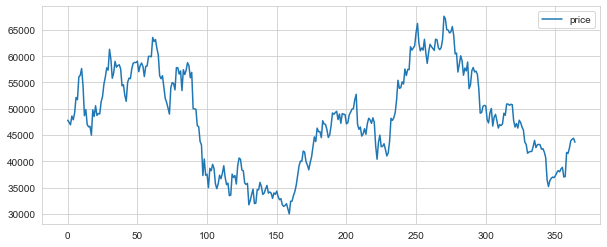

In [5]:
bitcoin['price'].plot(legend=True,figsize=(10,4))

<AxesSubplot:>

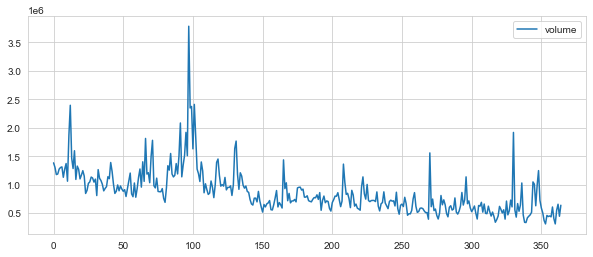

In [6]:
bitcoin['volume'].plot(legend=True,figsize=(10,4))

<AxesSubplot:>

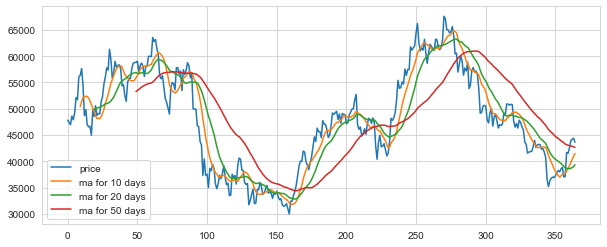

In [7]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = f'ma for {ma} days'
    bitcoin[column_name] = [np.nan for i in np.arange(ma-1)] + moving_average(bitcoin['price'],ma).tolist()
bitcoin[['price','ma for 10 days','ma for 20 days','ma for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:>

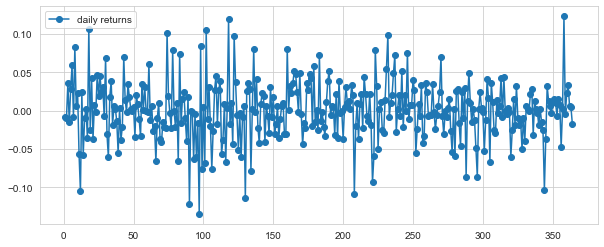

In [8]:
bitcoin['daily returns'] = bitcoin['price'].pct_change()
bitcoin['daily returns'].plot(legend=True,figsize=(10,4),marker='o')

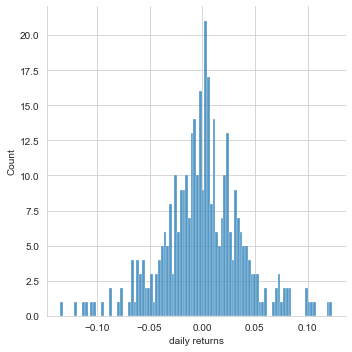

In [9]:
sns.displot(bitcoin['daily returns'],bins=100)

In [10]:
closing_df = pd.DataFrame()
for coin in coin_list:
    closing_df[coin] = globals()[coin]['price']
closing_df

,bitcoin,ethereum,fantom,solana,polkadot,the-sandbox,kusama,decentraland
0,47815.961756,1782.508869,0.178997,9.200179,25.116027,0.158506,142.303769,0.278153
1,47414.186255,1841.197751,0.184817,9.228805,28.637121,0.161891,153.667048,0.304190
2,46941.292086,1810.842546,0.179847,8.713970,27.947635,0.199804,161.117542,0.341852
3,48607.874522,1804.984146,0.170028,8.727632,27.052950,0.266865,158.905985,0.311356
4,47898.487028,1775.758352,0.173964,8.847305,27.686623,0.239003,188.535614,0.297362
...,...,...,...,...,...,...,...,...
360,42475.543221,3062.805808,2.159515,115.283478,21.934545,4.675752,195.568387,3.318725
361,43910.929986,3149.953286,2.322532,117.671873,22.421151,4.700717,198.892008,3.301559
362,44184.447512,3127.438107,2.212442,113.697455,21.716960,4.833026,192.569184,3.495627
363,44383.888055,3240.921044,2.254135,114.343587,21.958283,4.719626,192.530069,3.353972


In [11]:
rets = closing_df.pct_change()
rets

,bitcoin,ethereum,fantom,solana,polkadot,the-sandbox,kusama,decentraland
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008403,0.032925,0.032513,0.003111,0.140193,0.021354,0.079852,0.093607
2,-0.009974,-0.016487,-0.026892,-0.055786,-0.024077,0.234194,0.048485,0.123812
3,0.035504,-0.003235,-0.054598,0.001568,-0.032013,0.335632,-0.013726,-0.089208
4,-0.014594,-0.016192,0.023150,0.013712,0.023423,-0.104406,0.186460,-0.044945
...,...,...,...,...,...,...,...,...
360,0.023663,0.014620,0.029491,0.008312,0.024469,0.066525,0.055065,0.089065
361,0.033793,0.028453,0.075488,0.020718,0.022184,0.005339,0.016995,-0.005172
362,0.006229,-0.007148,-0.047401,-0.033775,-0.031407,0.028147,-0.031790,0.058780
363,0.004514,0.036286,0.018845,0.005683,0.011112,-0.023463,-0.000203,-0.040523


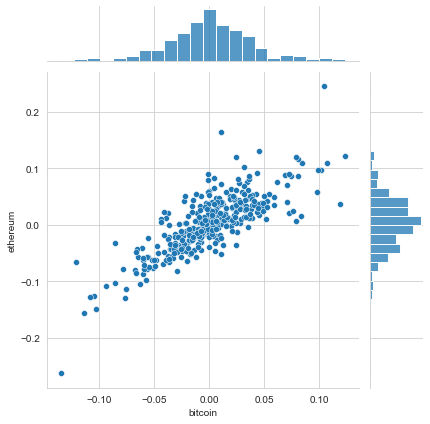

In [12]:
sns.jointplot(x='bitcoin',y='ethereum',data=rets,kind='scatter')

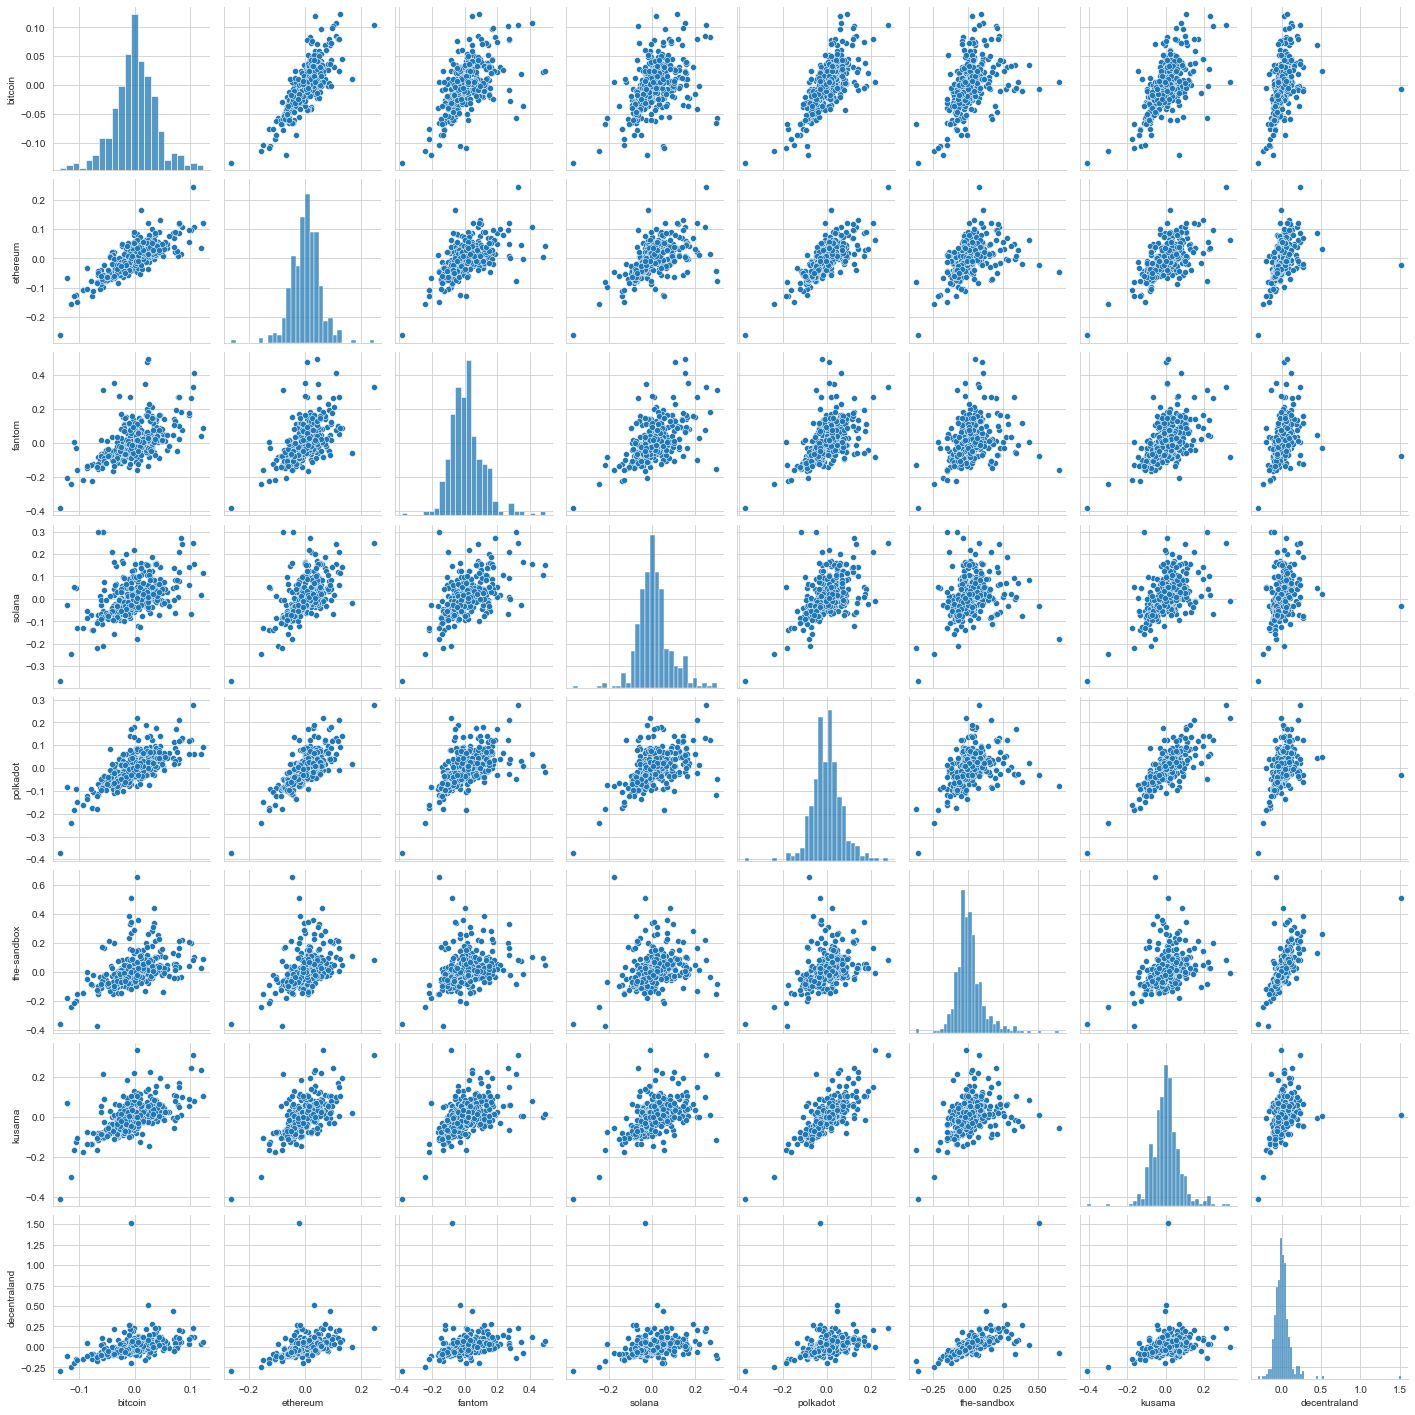

In [13]:
sns.pairplot(rets.dropna())

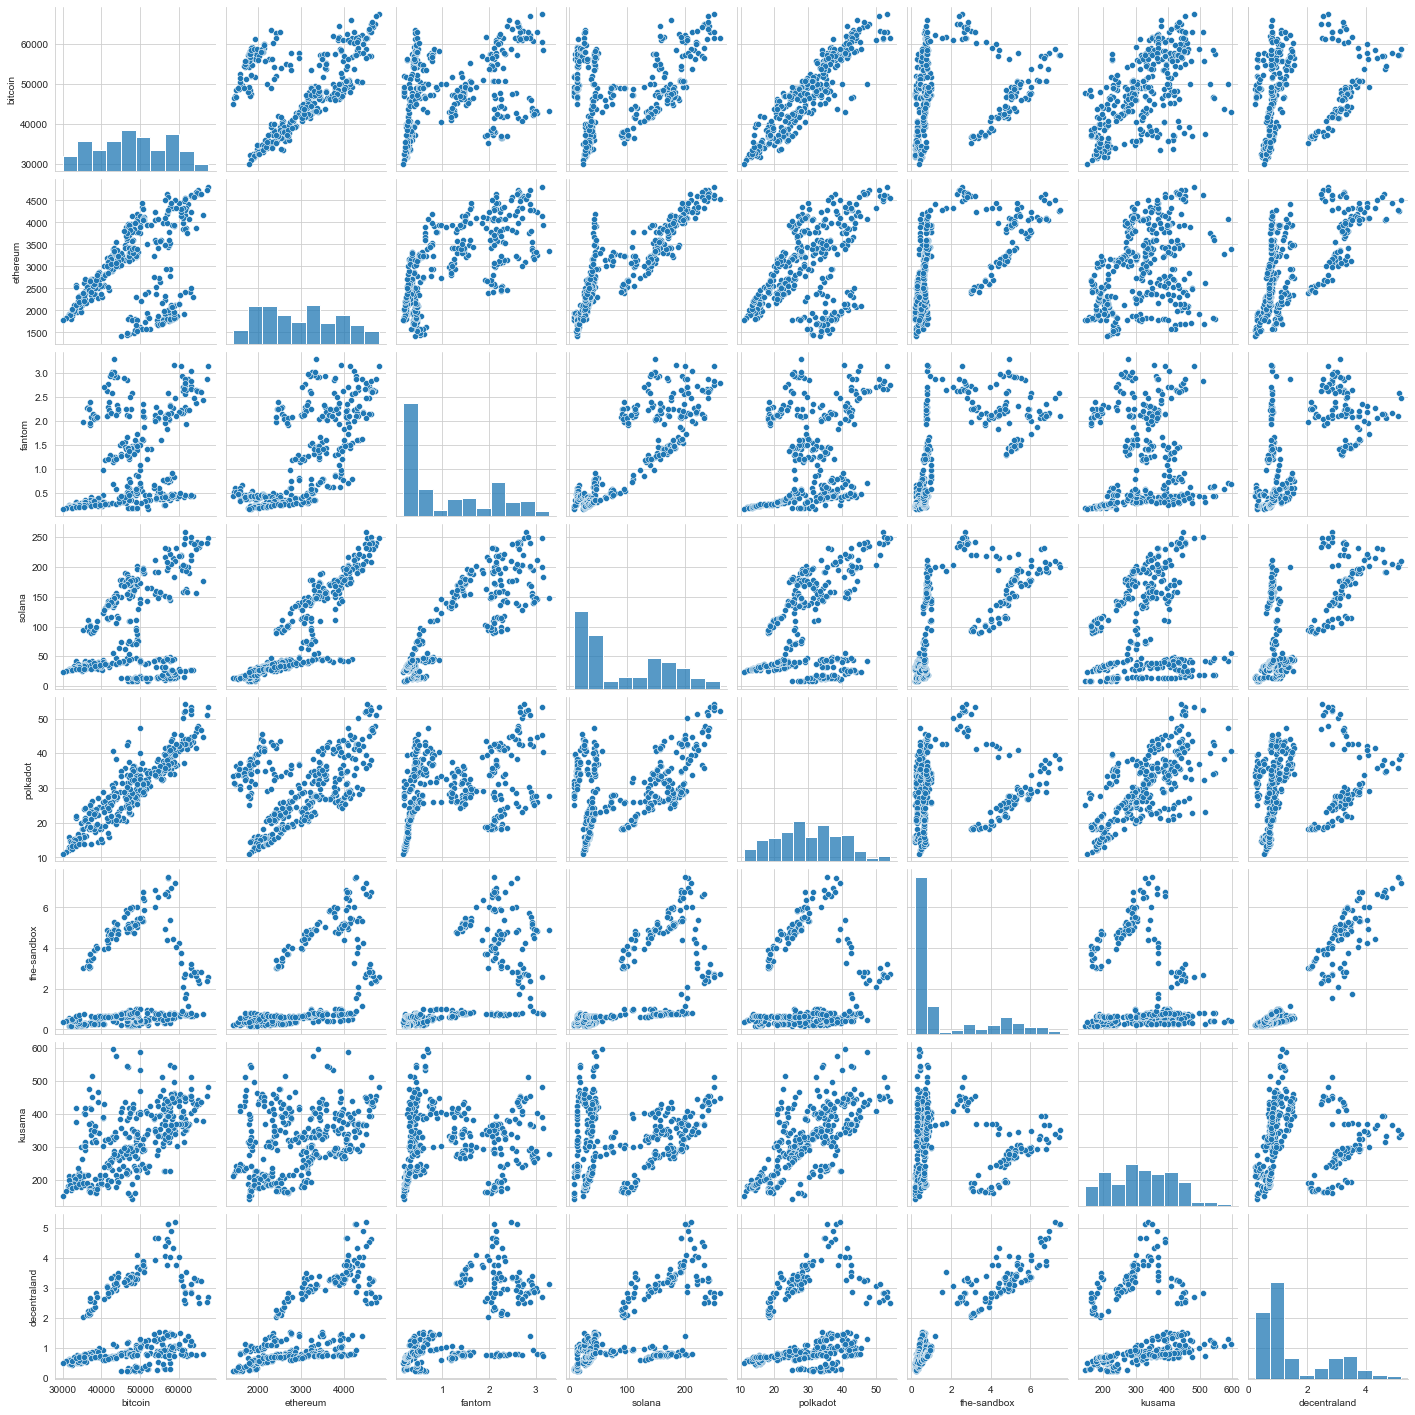

In [14]:
sns.pairplot(closing_df.dropna())

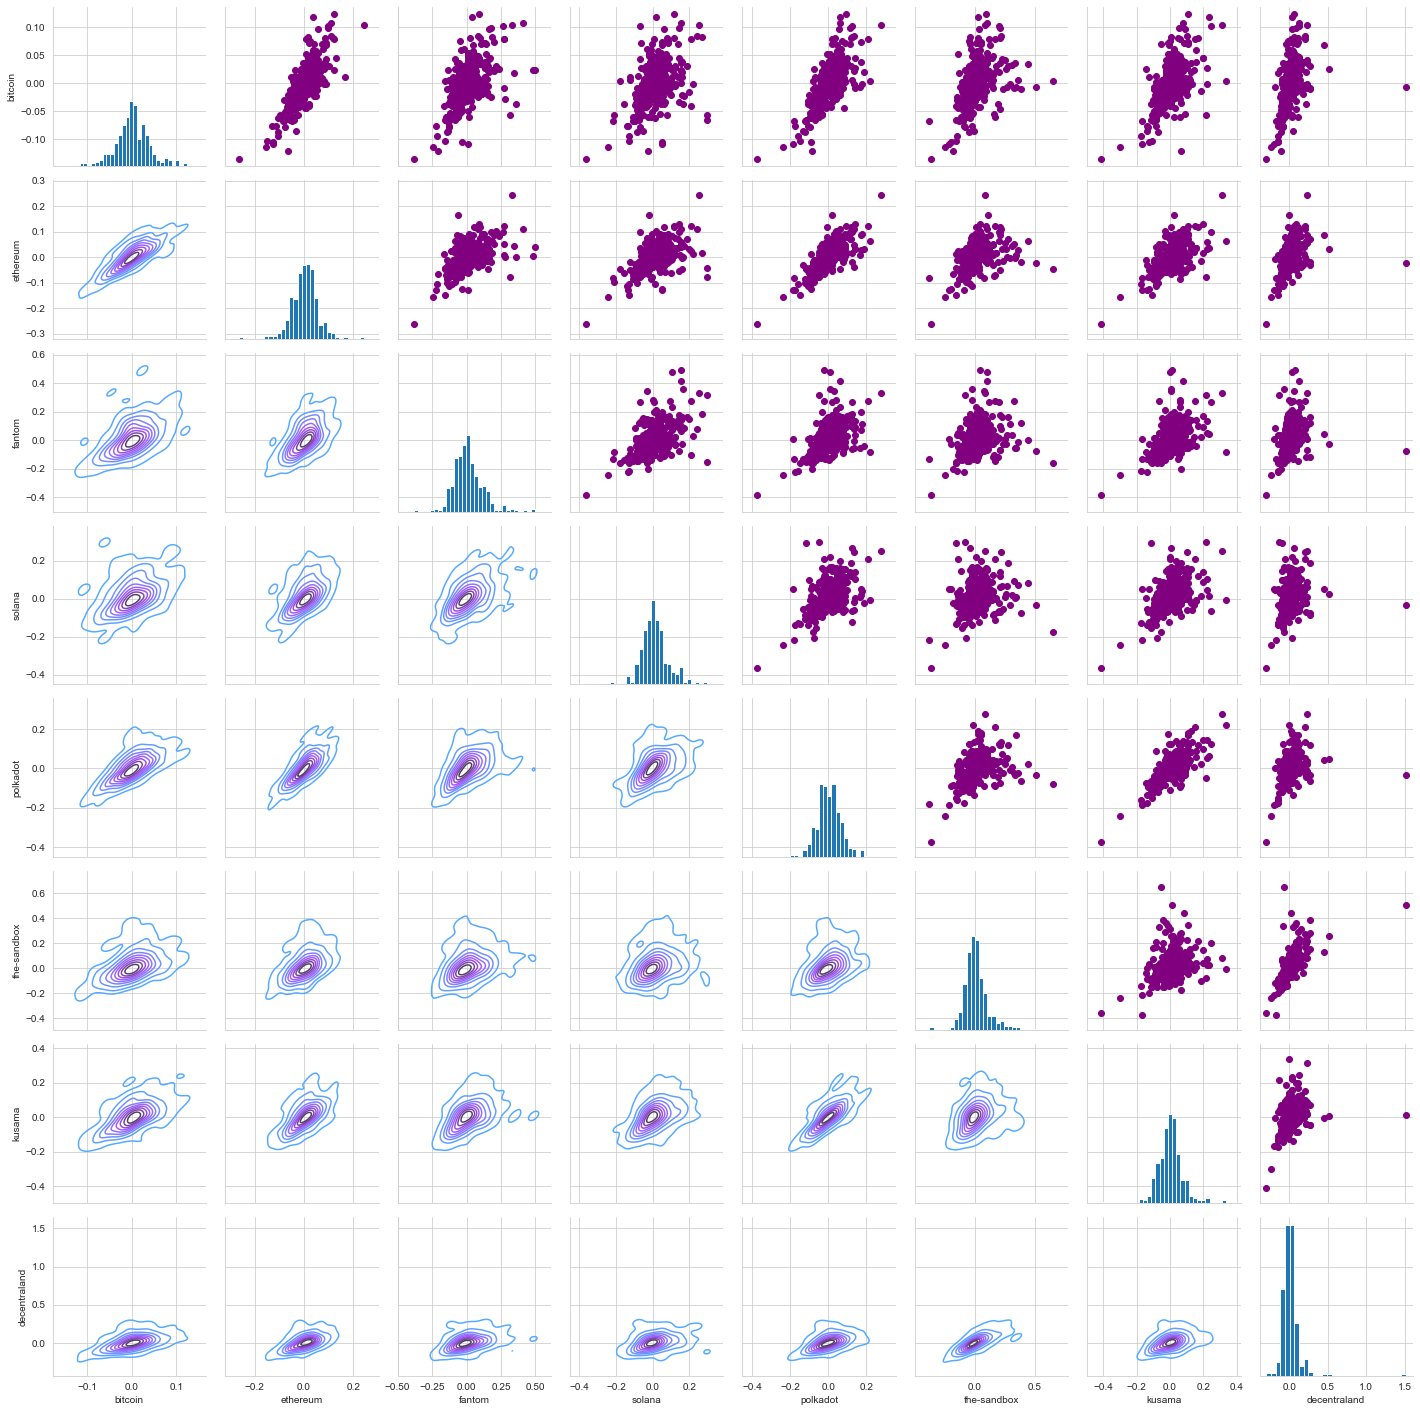

In [16]:
rets_fig = sns.PairGrid(rets.dropna())
rets_fig.map_upper(plt.scatter,color='purple')
rets_fig.map_lower(sns.kdeplot,cmap='cool_d')
rets_fig.map_diag(plt.hist,bins=30)

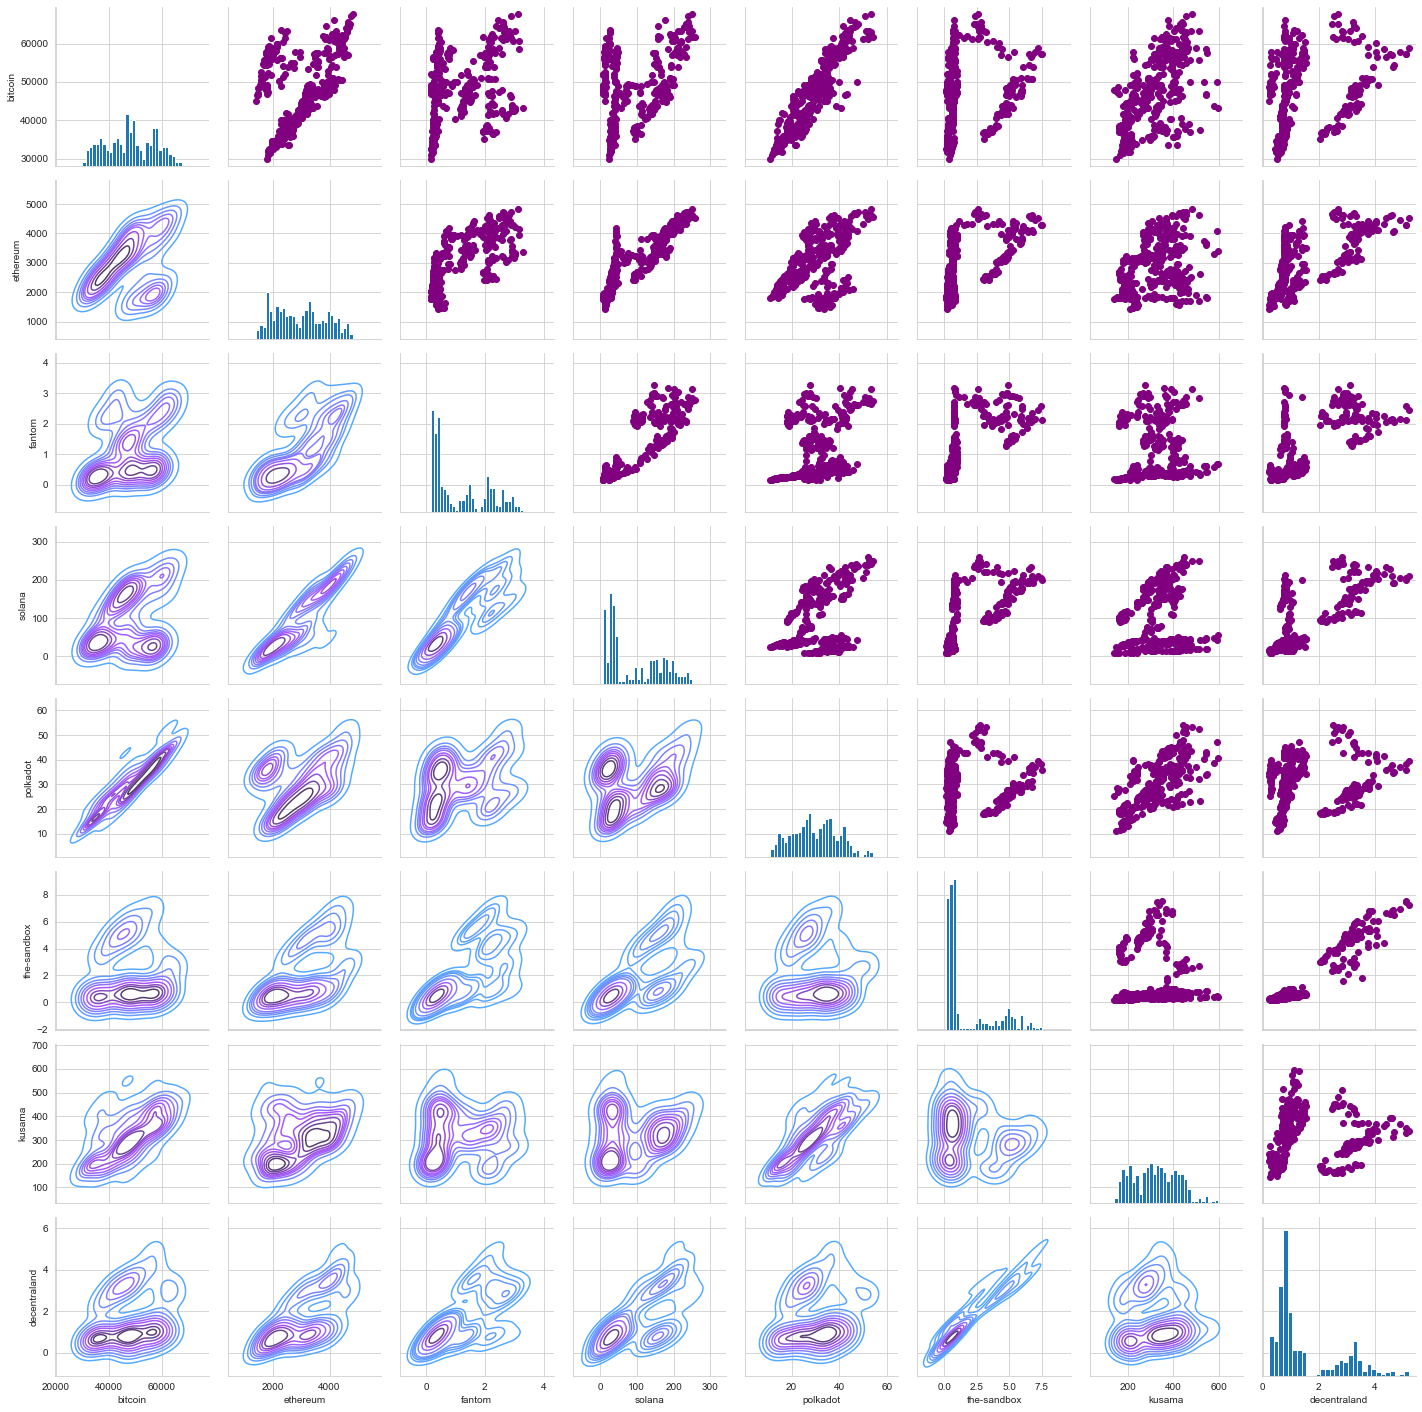

In [17]:
price_fig = sns.PairGrid(closing_df.dropna())
price_fig.map_upper(plt.scatter,color='purple')
price_fig.map_lower(sns.kdeplot,cmap='cool_d')
price_fig.map_diag(plt.hist,bins=30)

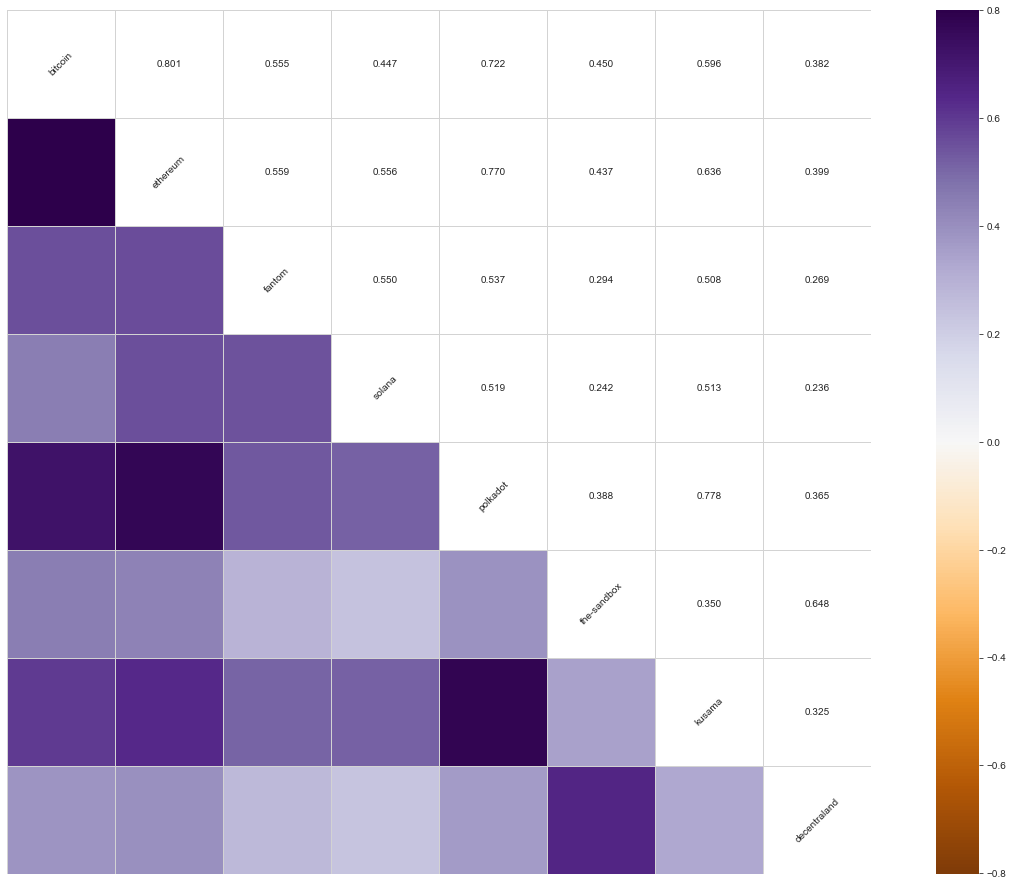

In [35]:
corr = rets.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(facecolor='white')
ax = fig.add_axes([0,0,3,3])
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,i+0.5, corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

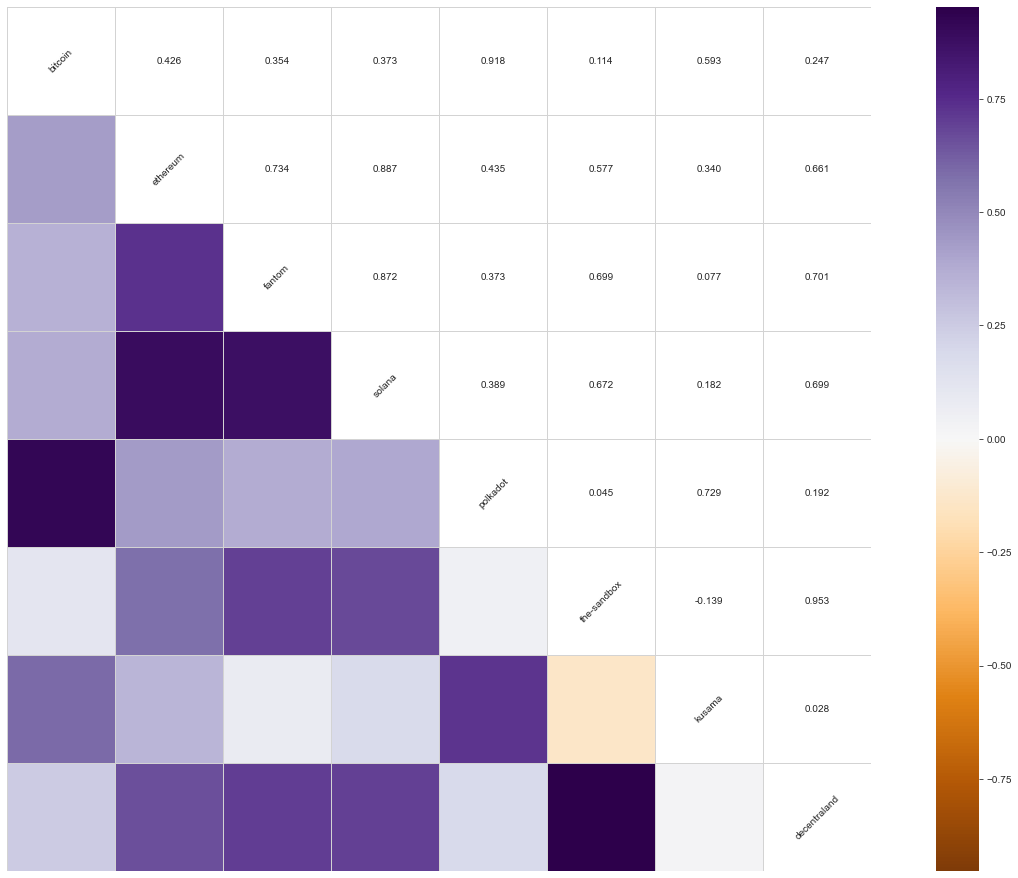

In [36]:
corr = closing_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(facecolor='white')
ax = fig.add_axes([0,0,3,3])
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,i+0.5, corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

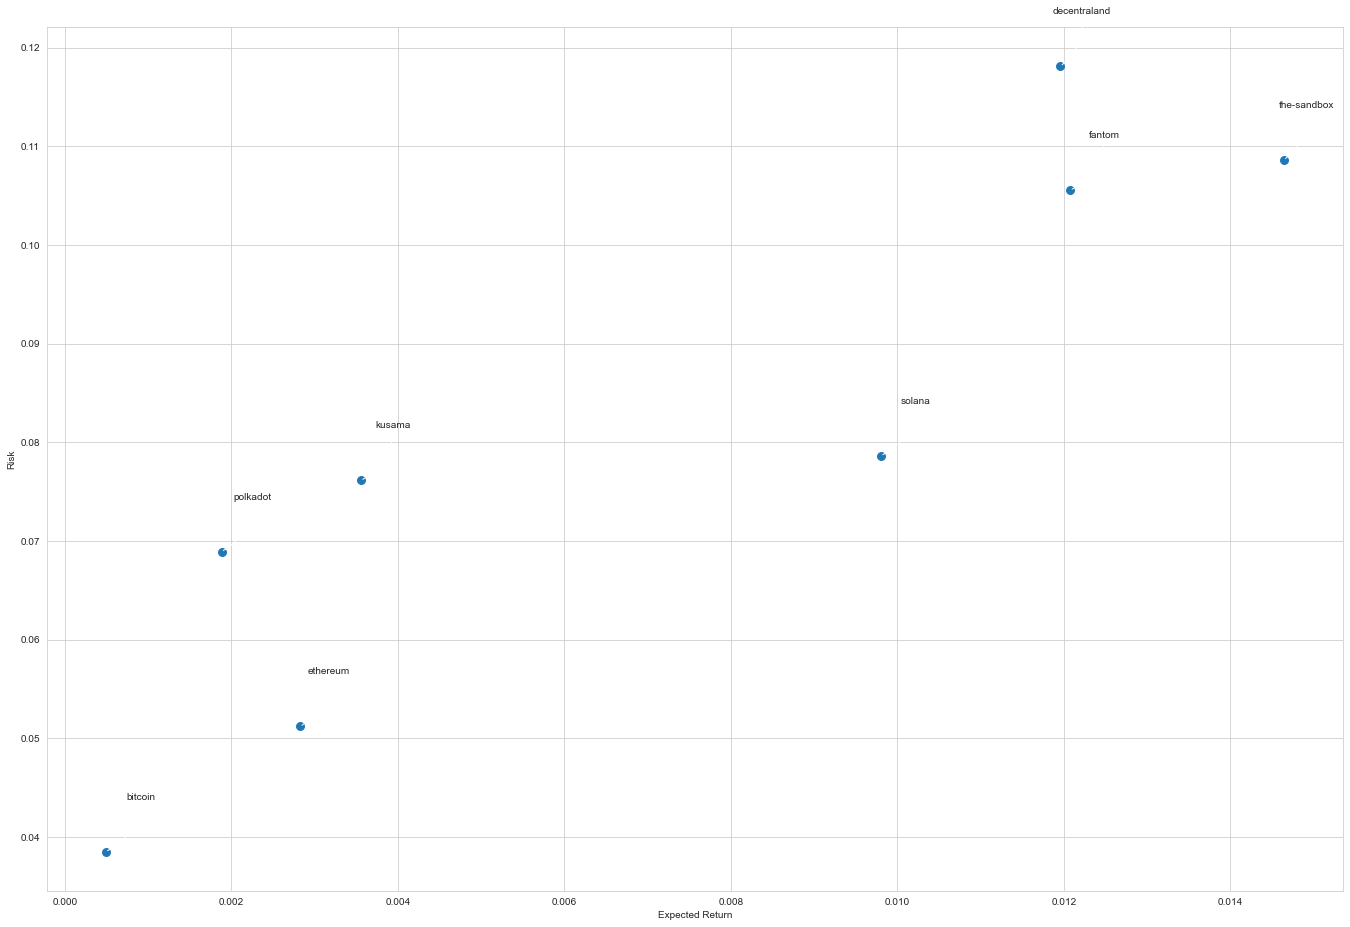

In [42]:
rets = rets.dropna()
area = np.pi*20
fig = plt.figure(facecolor='white')
ax = fig.add_axes([0,0,3,3])
ax.scatter(rets.mean(),rets.std(),s=area)
ax.set_xlabel('Expected Return')
ax.set_ylabel('Risk')
for la, x, y in zip(rets.columns, rets.mean(), rets.std()):
    ax.annotate(
        la,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3')
    )
plt.show()

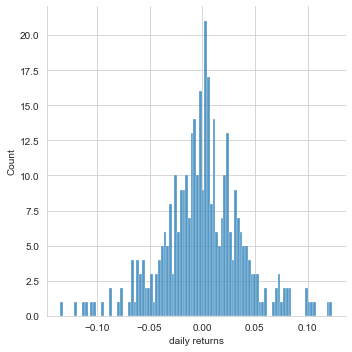

In [43]:
sns.displot(bitcoin['daily returns'],bins=100)

In [46]:
rets['bitcoin'].quantile(0.05)

-0.060910180201382114

In [47]:
days = 365
dt = 1/days
coin = 'bitcoin'
mu = rets.mean()[coin]
sigma = rets.std()[coin]
def monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

Text(0.5, 1.0, 'monte carlo analysis')

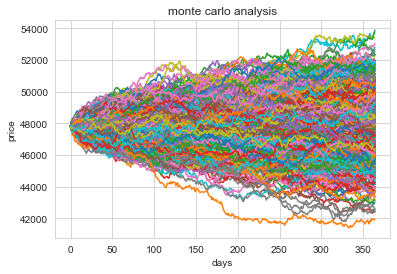

In [49]:
start_price = closing_df[coin][0]
for run in range(1000):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
plt.xlabel('days')
plt.ylabel('price')
plt.title('monte carlo analysis')

In [50]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]

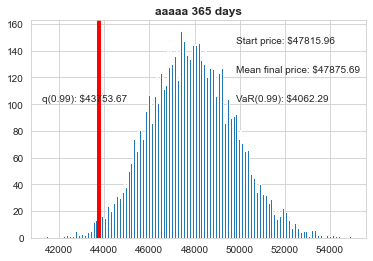

In [53]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"aaaaa %s days" % days, weight='bold');
